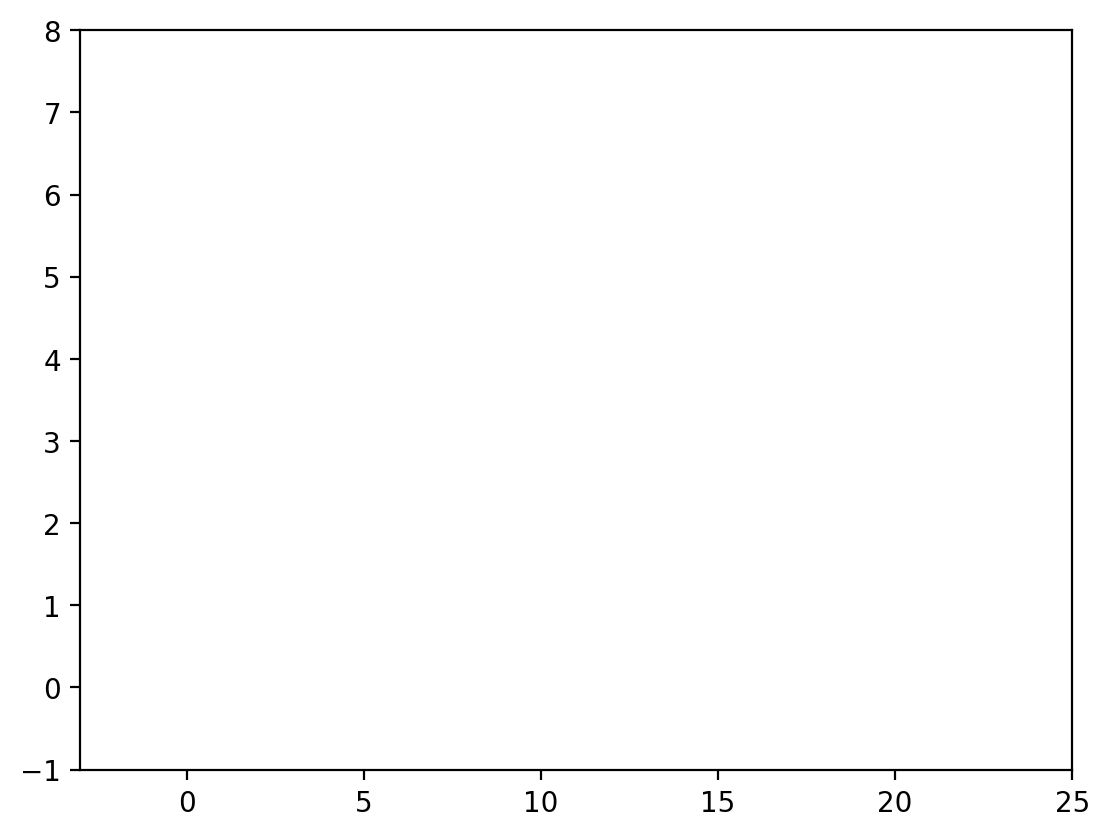

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 19 09:50:00 2021
@author: iiitdwd
"""

import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import numpy as np
from pylab import*
import math


# Ball.py: Isolated ball with Mass and Radius for OOP

class Ball:
    def __init__(self, mass, radius):            # ball class constructor
        self.m = mass                                   # initialize mass
        self.r = radius                               # initialize radius
        
    def getM1(self):                                      # get ball mass
        return self.m                  
         
    def getR(self):                                          # get radius
        return self.r                             # get moment of inertia
        
    def getI1(self):
        return (2.0/5.0)*self.m*(self.r)**2


# Path.py: Parabolic Trajectory of COM for OOP

class Path:                                            # Path of COM mass
        
   def __init__(self, v0, theta):              # constructor for parabola
        self.g = 9.8                                            # gravity
        self.v0 = v0                                      # initial speed
        self.theta = theta                                # initial angle
        self.v0x = self.v0*math.cos(self.theta*math.pi/180.0)        # Vx
        self.v0y = self.v0*math.sin(self.theta*math.pi/180.0)        # Vy
        
   def getX(self, t):                                          # get Xcom
        self.t = t
        return self.v0x*self.t
        
   def getY(self, t):                                          # get Ycom
        self.t = t
        return self.v0y*self.t  -  0.5*self.g*t**2

class Baton(Ball, Path):   
                              # import other classes
   # Baton inherits Ball and Path props
    def __init__(self, mass, radius, v0, theta, L1, w1): #construct Baton
        Ball.__init__(self, mass, radius)           # construct Ball
        Path.__init__(self, v0, theta)              # construct Path
        self.L = L1                                        # Baton length
        self.w = w1                                  # Baton ang velocity
        
    def getM(self):
        return 2.0*self.getM1()
    
    def getI(self):
        return (2*self.getI1() + 0.5*self.getM()*self.L**2)
        
    def getXa(self, t):
        xa = self.getX(t) +  0.5*self.L*cos(self.w*t)
        return xa
        
    def getYa(self, t):
        return self.getY(t) +  0.5*self.L*sin(self.w*t)

    def getXb(self, t):
        return self.getX(t) -  0.5*self.L*cos(self.w*t)
        
    def getYb(self, t):
        return self.getY(t) -  0.5*self.L*sin(self.w*t)

    # creating a blank window for the animation 
    # what will our line dataset contain? 
     
    # animation function 
"""
Calling the animation function	 animate(i), which takes an argument i, 
where i is called the frame number and using this we create the sine wave(or any other figure) 
which will continuously vary depending upon the value of i. 
 we use the FuncAnimation function to create an animation which will display 200 frames per second 
and in an interval of 20 micro secs.
"""
    #t = 0.1*np.linspace(1,500,500) 
    # x, y values to be plotted 
    #xx = t * np.sin(t) 
    #yy = t * np.cos(t)
    #plt.plot(xx, yy,'*-')
mybaton = Baton(0.5, 0.4, 15.0, 45.0, 2.5, -22.0)# mass, radius, v0, theta, L1, w1)
fig = plt.figure(dpi=200) 
axis = plt.axes(xlim =(-3, 25),ylim =(-1, 8)) 
#line, = axis.plot([], [], lw = 2) 
line, = axis.plot([], [], '-r.', lw = 1)
def init(): 
    line.set_data([], []) 
    return line, 
    # initializing empty values for x and y co-ordinates 
xdata, ydata = [], []
def animate(i): 
    	# t is a parameter which varies with the frame number 
    t = 0.02 * i
    	
    	# x, y values to be plotted 
    if mybaton.getXa(t)<=20:
        x = [mybaton.getXa(t),mybaton.getXb(t)]
        y = [mybaton.getYa(t),mybaton.getYb(t)]
        	
        # appending values to the previously empty x and y data holders 
        xdata.append(x) 
        ydata.append(y) 
        line.set_data(xdata, ydata)
#        line.set_data(x, y)
        print (i,x,y)
        return line, 
    
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 101, interval = 1, blit = False,repeat=True)
#anim.save('baton_animation.gif', writer='imagemagick', fps=30)
#plt.draw()
#show()
# saves the animation in our desktop 
#anim.save('baton_animation.mp4', writer = 'ffmpeg', fps = 30) 